# データ準備

チャンネル:  Fz
----------------------------------------
バンドパスフィルタ:  0.5 - 40.0 Hz
標準化しました。
正規化しました。
外れ値除去しました。
ダウンサンプリングしました。
ダウンサンプリング後のサンプリング周波数:  100 Hz
----------------------------------------


0it [00:00, ?it/s]

['12', '1']
12-1 をキーに追加しました
['10', '1']
10-1 をキーに追加しました
['8', '1']
8-1 をキーに追加しました
['13', '2']
13-2 をキーに追加しました
['5', '1']
5-1 をキーに追加しました
['1', '1']
1-1 をキーに追加しました
['3', '2']
3-2 をキーに追加しました
['3', '1']
3-1 をキーに追加しました
['6', '2']
6-2 をキーに追加しました
['6', '1']


1it [00:01,  1.36s/it]

6-1 をキーに追加しました
['2', '1']
2-1 をキーに追加しました
['10', '3']
10-3 をキーに追加しました
['8', '3']
8-3 をキーに追加しました
['14', '3']
14-3 をキーに追加しました
['14', '2']
14-2 をキーに追加しました
['11', '2']
11-2 をキーに追加しました
['11', '3']
11-3 をキーに追加しました
['9', '3']
9-3 をキーに追加しました
['5', '3']
5-3 をキーに追加しました
['5', '2']
5-2 をキーに追加しました
['7', '3']
7-3 をキーに追加しました
['1', '3']
1-3 をキーに追加しました
['6', '3']
6-3 をキーに追加しました
['4', '3']
4-3 をキーに追加しました
['4', '2']
4-2 をキーに追加しました
['2', '2']


2it [00:03,  1.63s/it]

2-2 をキーに追加しました
----------------------------------------
ウィンドウ: 5秒, スライド: 1秒でデータのセグメンテーションが完了しました。
----------------------------------------
データがセグメントされた辞書: split_data_dic
ラベルの取り出し例: label = list(split_data_dic["1-1"])
データの取り出し例: data = split_data_dic["1-1"][label]
セグメントされた行列データ形状:  (596, 500)
----------------------------------------
セグメントされたデータの取り出しが完了しました。
セグメントされたデータの形状:  (596, 500)


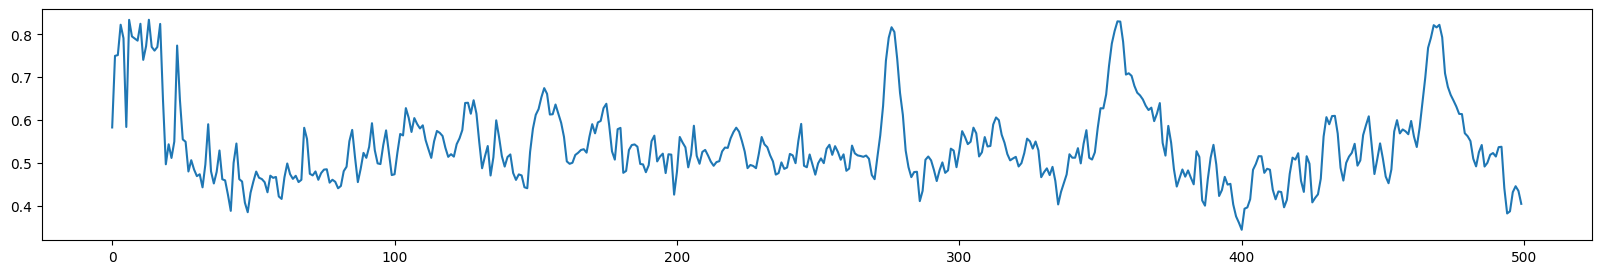

In [3]:
# ディレクトリを親ディレクトリに移動する
# c:\Users\panga\Documents\research\drowsiness_detection_independentにいるのを確認

# 辞書データの作成
import sys
sys.path.append('./independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils
import numpy as np


CHANNEL = "Fz"  # チャンネル名
print("チャンネル: ", CHANNEL)

WINDOW_SEC = 5  # 分割するウィンドウサイズ（秒）
OVER_SEC = 4  # オーバーラップする時間（秒）
SLIDE_SEC = WINDOW_SEC - OVER_SEC  # スライドする時間（秒）

# EMGの有効周波数帯は0-500Hzなのでバンドパスフィルタはかけない
BANDPASS = True  # True: バンドパスフィルタをかける / False: バンドパスフィルタをかけない
FS = 512
LOWCUT = 0.5
HIGHCUT = 40.0

STANDARDIZATION = True
NORMALIZATION = True
REMOVE_OUTLIERS = True

DOWNSAMPLING = True  # True: ダウンサンプリングを行う / False: ダウンサンプリングを行わない
FR = 100
CUTOFF = FR/2


# 適用した前処理の表示
print("----------------------------------------")
if BANDPASS:
    print("バンドパスフィルタ: ", f"{LOWCUT} - {HIGHCUT} Hz")
if STANDARDIZATION:
    print("標準化しました。")
if NORMALIZATION:
    print("正規化しました。")
if REMOVE_OUTLIERS:
    print("外れ値除去しました。")
if DOWNSAMPLING:
    print("ダウンサンプリングしました。")
    print("ダウンサンプリング後のサンプリング周波数: ", FR, "Hz")
print("----------------------------------------")


# 被験者の実験データを辞書に格納
data_dic = load_data.create_dataset_for_independent(CHANNEL, BANDPASS, FS, LOWCUT, HIGHCUT, STANDARDIZATION, NORMALIZATION, REMOVE_OUTLIERS, DOWNSAMPLING, CUTOFF, FR, WINDOW_SEC, OVER_SEC)

# もしダウンサンプリングしたら、ダウンサンプリング後のサンプリング周波数を取得
if DOWNSAMPLING:
    FS = FR

# 被験者のデータリスト
subj_list = [
    "1-1", "1-3",
    "2-1", "2-2",
    "3-1", "3-2",
    "4-2", "4-3",
    "5-1", "5-2", "5-3",
    "6-1", "6-2", "6-3",
    "7-3",
    "8-1", "8-3",
    "9-3",
    "10-1", "10-3",
    "11-2", "11-3",
    "12-1",
    "13-2",
    "14-2", "14-3"
]



# 辞書内データのセグメンテーション
split_data_dic = preprocessing.split_data_by_subject(data_dic, WINDOW_SEC, SLIDE_SEC, fs=FS)  # 辞書内のデータを分割
print("----------------------------------------")
print("データがセグメントされた辞書: split_data_dic")
print("ラベルの取り出し例: label = list(split_data_dic[\"1-1\"])")  # ラベルの取り出し例
print("データの取り出し例: data = split_data_dic[\"1-1\"][label]")  # データの取り出し例
print("セグメントされた行列データ形状: ", np.array(list(split_data_dic["1-1"].values())[0]).shape)  # 分割されたデータの形状を表示



# セグメントされたデータの取り出し（例）
segments = need_utils.get_segments_from_split_data(split_data_dic, "1-1")
print("セグメントされたデータの形状: ", segments.shape)  # セグメントされたデータの形状を表示 --> (セグメント数, サンプル数)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
plt.plot(segments[0])
plt.show()


## numpy配列に変換

In [4]:
subj_list = [
    ["1-1", "1-3"], 
    ["2-1", "2-2"], 
    ["3-1", "3-2"],
    ["4-2", "4-3"],
    ["5-1", "5-2", "5-3"],
    ["6-1", "6-2", "6-3"],
    ["7-3"],
    ["8-1", "8-3"],
    ["9-3"],
    ["10-1", "10-3"],
    ["11-2", "11-3"],
    ["12-1"],
    ["13-2"],
    ["14-2", "14-3"]
]

# test_subj_list = [["1-1", "1-3"]]  # テスト被験者

# train_subj_list = [subj for subj in subj_list if subj not in test_subj_list]

train_segments = []
train_labels = []


for experiments in subj_list:
    print(experiments)
    for subj_experiment in experiments:
        segments = need_utils.get_segments_from_split_data(split_data_dic, subj_experiment)
        label = list(split_data_dic[subj_experiment].keys()) * len(segments)
        train_segments.append(segments)
        train_labels.append(label)

    X = np.concatenate(np.array(train_segments), axis=0)
    y = np.concatenate(np.array(train_labels), axis=0)

print("X: ", X.shape)
print("y: ", y.shape)


['1-1', '1-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
['2-1', '2-2']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
['3-1', '3-2']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
['4-2', '4-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
['5-1', '5-2', '5-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
['6-1', '6-2', '6-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
--------------------------------------

# カオス解析：位相空間再構成と遷移ネットワークの構築

In [5]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import pdist, squareform

class ChaosAnalyzer:
    def __init__(self, embedding_dim=3, delay=2, bin_size=20):
        self.embedding_dim = embedding_dim
        self.delay = delay
        self.bin_size = bin_size

    def reconstruct_phase_space(self, signal):
        """ 位相空間再構成（Time-Delay Embedding） """
        N = len(signal)
        reconstructed = np.array([signal[i:N-self.delay*(self.embedding_dim-1)+i:self.delay] for i in range(self.embedding_dim)]).T
        return reconstructed

    def build_transition_network(self, phase_space):
        """ 状態遷移ネットワークを構築 """
        bins = [np.linspace(np.min(phase_space[:, i]), np.max(phase_space[:, i]), self.bin_size) for i in range(self.embedding_dim)]
        indices = np.zeros(phase_space.shape[0], dtype=int)

        for i in range(phase_space.shape[0]):
            idx = 0
            for j in range(self.embedding_dim):
                bin_idx = np.digitize(phase_space[i, j], bins[j]) - 1
                bin_idx = min(bin_idx, self.bin_size - 1)
                idx += bin_idx * (self.bin_size ** j)
            indices[i] = idx

        max_idx = np.max(indices)
        states = max_idx + 1
        transition_matrix = np.zeros((states, states))

        for i in range(len(indices) - 1):
            transition_matrix[indices[i], indices[i + 1]] += 1

        transition_matrix /= (np.sum(transition_matrix, axis=1, keepdims=True) + 1e-10)  # 正規化
        G = nx.from_numpy_array(transition_matrix, create_using=nx.DiGraph)
        return G, transition_matrix


## 高速化

In [6]:
import cupy as cp
import numpy as np  # 元のコードでnumpyを使用している部分も残しておきます
import networkx as nx
from scipy.spatial.distance import pdist, squareform

class ChaosAnalyzerGPU:
    def __init__(self, embedding_dim=3, delay=2, bin_size=20):
        self.embedding_dim = embedding_dim
        self.delay = delay
        self.bin_size = bin_size

    def reconstruct_phase_space(self, signal):
        """ 位相空間再構成（Time-Delay Embedding） """
        N = len(signal)
        reconstructed = cp.array([signal[i:N-self.delay*(self.embedding_dim-1)+i:self.delay] for i in range(self.embedding_dim)]).T
        return reconstructed

    def build_transition_network(self, phase_space):
        """ 状態遷移ネットワークを構築 """
        num_points = phase_space.shape[0]
        embedding_dim = self.embedding_dim
        bin_size = self.bin_size

        bins = [cp.linspace(cp.min(phase_space[:, i]), cp.max(phase_space[:, i]), bin_size) for i in range(embedding_dim)]
        indices = cp.zeros(num_points, dtype=cp.int32)

        for i in range(num_points):
            idx = 0
            for j in range(embedding_dim):
                bin_idx = cp.digitize(phase_space[i, j], bins[j]) - 1
                bin_idx = cp.minimum(bin_idx, bin_size - 1)
                idx += bin_idx * (bin_size ** j)
            indices[i] = idx

        max_idx = cp.max(indices)
        states = int(max_idx + 1)
        transition_matrix = cp.zeros((states, states), dtype=cp.float32)

        for i in range(len(indices) - 1):
            transition_matrix[indices[i], indices[i + 1]] += 1

        sum_row = cp.sum(transition_matrix, axis=1, keepdims=True)
        transition_matrix /= (sum_row + 1e-10)  # 正規化

        # CuPyの配列をNumPyの配列に戻してnetworkxで処理
        transition_matrix_np = cp.asnumpy(transition_matrix)
        G = nx.from_numpy_array(transition_matrix_np, create_using=nx.DiGraph)
        return G, transition_matrix

c:\Users\panga\anaconda3\envs\tf\lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


# GNNを用いた分類モデル

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(GNNClassifier, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# 個人適応モデルの実装

In [8]:
from torch.optim import Adam
from torch_geometric.data import Data
from tqdm import tqdm

class PersonalizedTrainer:
    def __init__(self, model, lr=0.001):
        self.model = model
        self.optimizer = Adam(model.parameters(), lr=lr)

    def train(self, data, epochs=30):
        self.model.train()
        pbar = tqdm(range(epochs), desc='Training')
        for epoch in pbar:
            self.optimizer.zero_grad()
            out = self.model(data.x, data.edge_index)
            loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            self.optimizer.step()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    def fine_tune(self, data, few_shot_samples=5):
        """ 個人適応のためのFew-shot fine-tuning """
        self.model.train()
        few_shot_mask = torch.randperm(data.num_nodes)[:few_shot_samples]  # 少数サンプルで適応
        with tqdm(total=1, desc='Fine-tuning') as pbar:
            self.optimizer.zero_grad()
            out = self.model(data.x, data.edge_index)
            loss = F.nll_loss(out[few_shot_mask], data.y[few_shot_mask])
            loss.backward()
            self.optimizer.step()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            pbar.update(1)

# 実行

In [10]:
import numpy as np

# y_trainが0と1のインデックスを取得
indices_0 = np.where(y == 0)[0]
indices_1 = np.where(y == 1)[0]

# 各クラスからランダムに100個ずつサンプリング
np.random.seed(42)  # 再現性のためにシードを設定
num_train_samples = 150
num_test_samples = 30
sampled_indices_0 = np.random.choice(indices_0, num_train_samples, replace=False)
sampled_indices_1 = np.random.choice(indices_1, num_train_samples, replace=False)

# サンプリングされたインデックスを結合
sampled_indices = np.concatenate([sampled_indices_0, sampled_indices_1])

# サンプリングされたデータを取得
X = X[sampled_indices]
y = y[sampled_indices]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("y distribution:", np.bincount(y))

X shape: (300, 500)
y shape: (300,)
y distribution: [150 150]


In [11]:
import torch
import torch_geometric
import numpy as np
from torch_geometric.data import Data
from tqdm import tqdm

# セグメント化されたEEGデータの処理
def process_segmented_eeg(eeg_segments, y):
    """
    セグメント化されたEEGデータを処理し、各セグメントに対してカオス解析とGNNデータを作成
    Args:
        eeg_segments: (num_segments, segment_length) の形状を持つ2次元配列
        segment_length: 各セグメントのデータポイント数
    Returns:
        List[Data]: 各セグメントに対応するGNNデータのリスト
    """
    data_list = []
    for segment in tqdm(eeg_segments):
        # カオス解析 → 遷移ネットワーク作成
        analyzer = ChaosAnalyzer()
        phase_space = analyzer.reconstruct_phase_space(segment)
        G, transition_matrix = analyzer.build_transition_network(phase_space)

        # GNN用のデータ作成
        edge_index = torch.tensor(list(G.edges)).t().contiguous()
        x = torch.tensor(transition_matrix, dtype=torch.float)  # ノード特徴量
        # y = torch.randint(0, 2, (x.shape[0],))  # 仮のラベル（覚醒 or 眠気）

        # データをリストに追加
        data = Data(x=x, edge_index=edge_index, y=y)
        data.train_mask = torch.rand(x.shape[0]) < 0.8  # 80%を学習データに
        data_list.append(data)
    
    return data_list

# 例として、セグメント化されたEEGデータを作成
num_segments = X.shape[0]  # セグメント数
segment_length = X.shape[1]  # 各セグメントの長さ

# セグメント化されたデータを処理
data_list = process_segmented_eeg(X, y)

# モデルの学習
model = GNNClassifier(in_channels=data_list[0].x.shape[1], hidden_channels=16, num_classes=2)
trainer = PersonalizedTrainer(model, lr=0.0001)

# 各セグメントのデータで学習
for data in data_list:
    trainer.train(data, epochs=30)

# 個人適応のFine-tuning
trainer.fine_tune(data_list[-1], few_shot_samples=10)  # 最後のセグメントを使用

 29%|██▉       | 88/300 [02:13<05:22,  1.52s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 242.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 20.59 GiB is allocated by PyTorch, and 75.29 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)